In [44]:
import numpy as np
import matplotlib.pyplot as plt

from lib.estimate import *
from scipy.integrate import solve_ivp

## Generate Data (Simulate ODE)

In [45]:
def unicycle_ode(x, v, w):
    '''
    x - state
    v - forward velocity
    w - angular velocity
    '''
    dxdt = np.zeros(3)
    dxdt[0] = v*np.cos(x[2])
    dxdt[1] = v*np.sin(x[2])
    dxdt[2] = w
    return dxdt

In [46]:
tend = 10
integration_dt = 0.001

n_integration_steps = int(tend/integration_dt)
time = np.linspace(0, tend, n_integration_steps+1)

In [47]:
# Random Control Signals

def v(t):
    return np.cos(t)*0.3+1

def w(t):
    return np.sin(0.5*t)

In [48]:
# initial state
x0 = np.array([0, 0, 0])

sol = solve_ivp(lambda t, y: unicycle_ode(y, v(t), w(t)), (0, tend), x0, t_eval=time)
data = sol.y

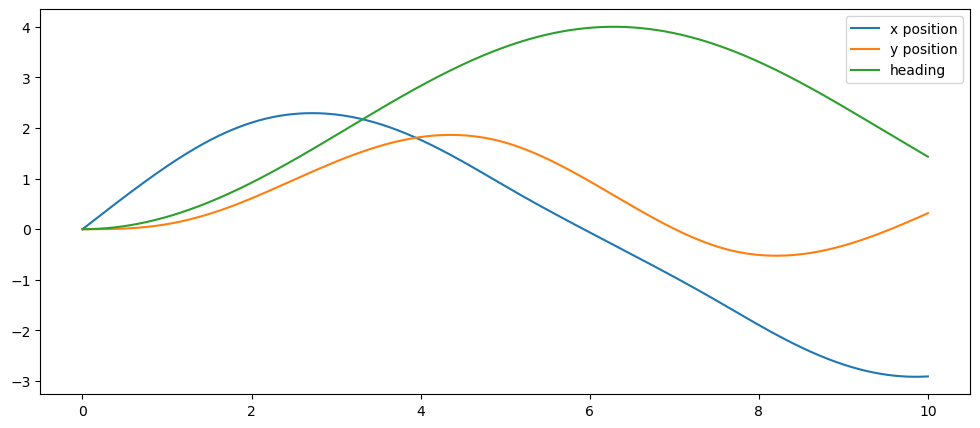

In [49]:
plt.figure(figsize=(12,5))
plt.plot(time, data.T)
plt.legend(["x position","y position", "heading"])
plt.show()

## Sampling

In [50]:
noise_mag = 0.3

sampling_dt = 0.2   # sampling time
n_steps_per_sample = int(sampling_dt/integration_dt)
n_samples = int(tend/sampling_dt)

sampled_time = time[::n_steps_per_sample]

#sampling only x and y position with noise
sampled_data = data[:2,::n_steps_per_sample] + noise_mag*(np.random.rand(2, n_samples+1)-0.5)

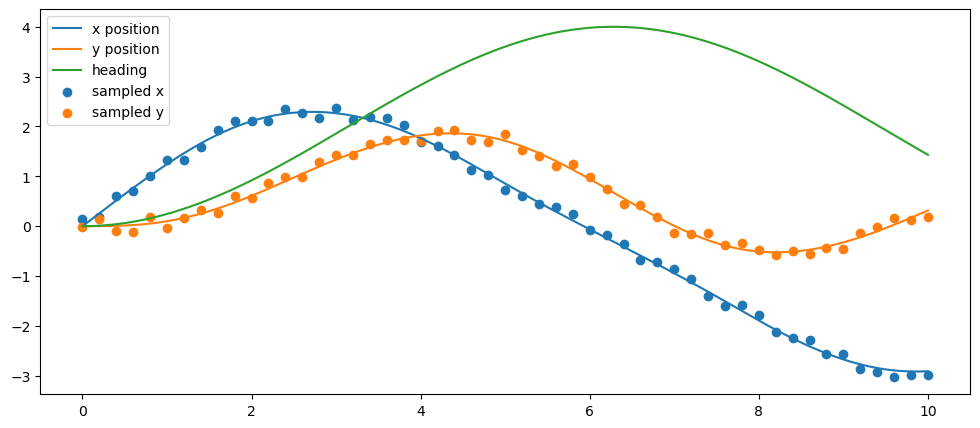

In [51]:
plt.figure(figsize=(12,5))
plt.plot(time, data.T)
[plt.scatter(sampled_time, sampled_data[i]) for i in range(sampled_data.shape[0])]
plt.legend(["x position","y position", "heading", "sampled x", "sampled y"])
plt.show()

In [52]:
Y_max = [0, 1.3, 0.8, 0.6]
y_hat, y_bound = get_gauss_estimates(sampled_time, sampled_data[0], Y_max, 5, sampling_dt, 2, 1, 2, integration_dt, noise_mag)

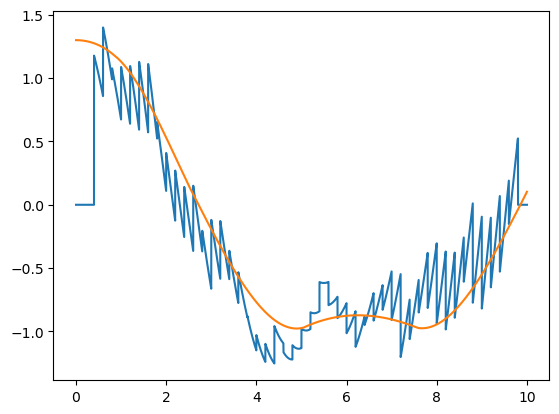

In [54]:
plt.plot(time, y_hat[1])
# plt.fill_between(time, y_hat[1]-y_bound[1], y_hat[1]+y_bound[1])
plt.plot(time, np.gradient(data[0], integration_dt))